In [36]:
import numpy as np
import matplotlib
import velGrid_old
import velGrid
import gridtools
from matplotlib.patches import Circle, Wedge, Polygon, Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

twopi = np.pi*2.

In [ ]:
reload(velGrid)

In [2]:
long2km = 1/0.011741652782473
lat2km = 1/0.008994627867046

# Fifth ring
# xmin = 116.1904 * long2km
# xmax = 116.583642 * long2km
# ymin = 39.758029 * lat2km
# ymax = 40.04453 * lat2km
# dxCell, dyCell = 1., 1. #in km

# Second ring
xmin = 116.33085226800 * long2km
xmax = 116.44826879600 * long2km
ymin = 39.85573366870 * lat2km
ymax = 39.96366920310 * lat2km
dxCell, dyCell = 1.0,1.0 #in km

# Recalc xmax so it's naice
xmax = ((xmax-xmin)//dxCell)*dxCell + xmin
ymax = ((ymax-ymin)//dyCell)*dyCell + ymin

# Let's use a smaller region
# xmax = xmin+10*dxCell
# ymax = ymin+10*dyCell

# fname = "vmin"+str(vmin)+"_nmin"+str(nmin)
fname = "/home/michael/msc/summer17/traffic/states/t1.0v0.n0s3r5l15_states"
fname2 = "/home/michael/msc/summer17/traffic/preds/t1.0v1.0n0s2r10l15e0.001sz256_pred"
run = "secondring"
vmin = 0.
nmin = 5
tggroup = "tg_15"
tglen = 20
nTG = 60*24//tglen

xCntrs = np.arange(xmin,xmax,dxCell) + 0.5*dxCell
yCntrs = np.arange(ymin,ymax,dyCell) + 0.5*dyCell
Nx = len(xCntrs)
Ny = len(yCntrs)

tag1 = "known"
tag2 = "pred"

statepath = "/home/michael/msc/summer17/traffic/states/"
statepath2 = "/home/michael/msc/summer17/traffic/preds/"
diffdir = "/home/michael/msc/summer17/traffic/"

# statepath = "/home/michael/msc/summer17/traffic/data/"+tggroup+"/states/"+run+"/"+fname+"/"
# statepath2 = "/home/michael/msc/summer17/traffic/data/"+tggroup+"/states/"+run+"/"+fname+"/predictions/"
# diffdir = "/home/michael/msc/summer17/traffic/data/"+tggroup+"/states/"+run+"/"+fname+"/diffs/"

In [4]:
ranges=[xmin,ymin,xmax,ymax]

In [ ]:
states[0][0]

In [25]:
reload(gridtools)

<module 'gridtools' from 'gridtools.py'>

In [26]:
gt = gridtools.gridtools(ranges,Nx,Ny,nTG,tglen)

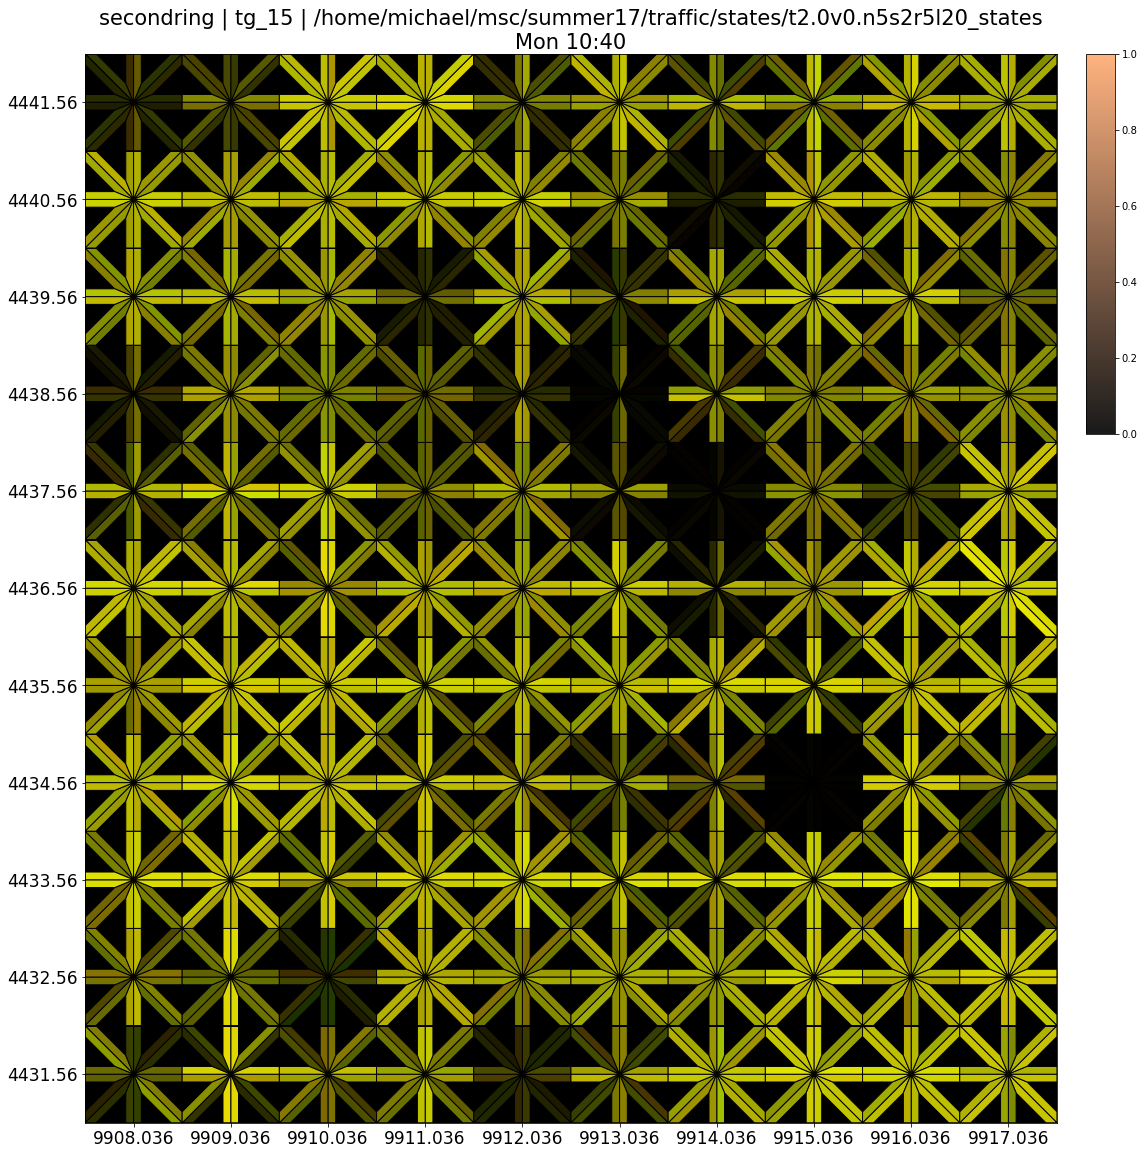

In [34]:
# Select day and time to look at
# grid form is [x][y][th]
d = 0
tg = 32
states = gt.read_states(fname,d,tg,order=[1,0])
states2 = gt.read_states(fname2,d,tg,order=[1,0])

tfsize = 12+(Nx//2)

f, ax = plt.subplots(1,1,figsize=(2*Nx,2*Ny))
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks(xCntrs)
ax.set_yticks(yCntrs)
plt.setp(ax.get_xticklabels(), fontsize=tfsize)
plt.setp(ax.get_yticklabels(), fontsize=tfsize)

gt.plotmap(ax,states2,xCntrs,yCntrs,d,tg)

clim = [[0.,1.],[0.,1.]]
rvb = gt.make_colormap([(0.1,0.1,0.1),(1.,0.7,0.5)])
im = plt.imshow(clim,cmap=rvb)
# plt.colorbar()
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.82, 0.6, 0.02, 0.24])
_ = f.colorbar(im, cax=cbar_ax,orientation='vertical')

days = {0:"Mon",
        1:"Tue",
        2:"Wed",
        3:"Thu",
        4:"Fri",
        5:"Sat",
        6:"Sun"}
tgperhr = 60//tglen
hr = str(tg//tgperhr)
m = str((tg%tgperhr)*tglen)
if m=="0": m="00"
title = run+" | "+tggroup+" | "+fname+"\n"+days[d]+" "+hr+":"+m
fsize = 16+(len(xCntrs)//2)
_ = ax.set_title(title,fontsize=fsize)


In [35]:
savedir="/home/michael/msc/summer17/traffic/imgs/"
savename = "state2.png"
f.savefig(savedir+savename)

In [ ]:
# Look at differences between two dtg
# grid form is [x][y][d][tg][th]
d1, d2 = 0, 0
tfsize = 12+(Nx//2)
ui = 0
cols = [(1,0,0),(0,0.6,0.4)]
clim = [[-1.,1.],[0.,1.]]
rvb = make_colormap([cols[0],(0,0,0),0.5,(0,0,0),cols[1]])

for tg1 in range(30):
    tg2 = tg1
    f, ax = plt.subplots(1,1,figsize=(2*Nx,2*Ny))
    diffmap(ax,states,states2,xCntrs,yCntrs,[d1,d2],[tg1,tg2],ui,tag1,tag2,cols)

    ax.set_ylim(ymin,ymax)
    ax.set_xlim(xmin,xmax)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks(xCntrs)
    ax.set_yticks(yCntrs)
    plt.setp(ax.get_xticklabels(), fontsize=tfsize)
    plt.setp(ax.get_yticklabels(), fontsize=tfsize)
    im = plt.imshow(clim,cmap=rvb)
    f.subplots_adjust(right=0.8)
    cbar_ax = f.add_axes([0.82, 0.6, 0.02, 0.24])
    f.colorbar(im, cax=cbar_ax,orientation='vertical')

    f.savefig(diffdir+"/"+tag1+"_"+tag2+"_s"+str(ui)+"_d"+str(d2)+"tg"+str(tg2)+".png")
    plt.close()
    
print "Done"

In [ ]:
# Select day and time to look at
ds = [0]
tgs = np.arange(10)
tgs = [i for i in range(60,71)]
tfsize = 12+(Nx//2)

f, ax = plt.subplots(1,1,figsize=(2*Nx,2*Ny))

path = statepath2
stat = states2

for d in ds:
    for tg in tgs:
        ax.set_ylim(ymin,ymax)
        ax.set_xlim(xmin,xmax)
        ax.set_aspect('equal', adjustable='box')
        ax.set_xticks(xCntrs)
        ax.set_yticks(yCntrs)
        plt.setp(ax.get_xticklabels(), fontsize=tfsize)
        plt.setp(ax.get_yticklabels(), fontsize=tfsize)
        plotmap(ax,stat,xCntrs,yCntrs,d,tg)
        f.savefig(path+"/imgs/d"+str(d)+"tg"+str(tg)+".png")
        ax.cla()
f.clf()
print "Done"